# UNAD
## Luis Alberto Salcedo Salas
### Dataset Regresión Logística – Heart Disease Cleveland UCI

__Pasos de la actividad__

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
1. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
1. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
1. Dividir el dataset en Train y Test para evaluar correctamente el modelo
1. Entrenar el modelo configurando los diferentes hiperparámetros
1. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
1. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
1. Interpretar, analizar y documentar los resultados obtenidos

# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay, classification_report

In [44]:
# Carga de datos en la variable Data y Lectura de datos

Data = pd.read_csv('D:/Documentos/Universidad. Ing Sistemas/10 - Semestre/Análisis de datos/Tarea 3/3. winequality-red.csv')
Data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
# Descripción de datos

Data.shape
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

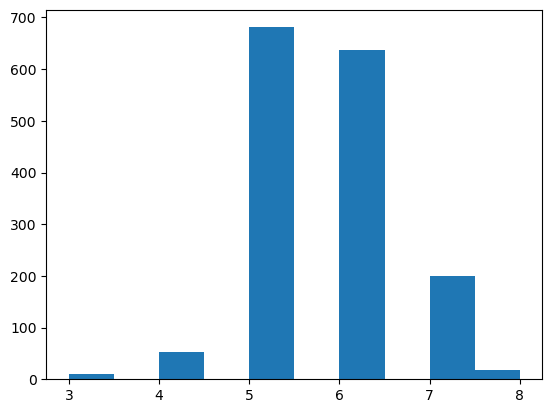

In [10]:
# Evaluación de distribución de calidad

plt.hist(Data['quality'])

<Axes: xlabel='fixed acidity'>

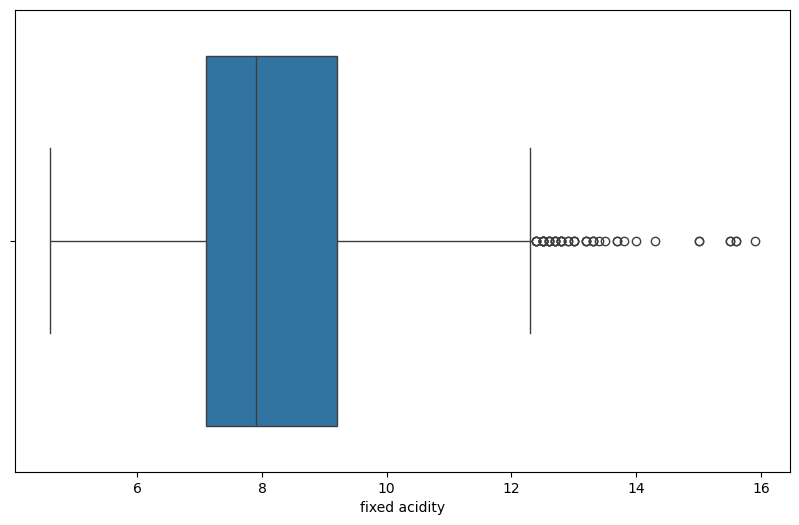

In [17]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['fixed acidity'])

<Axes: xlabel='citric acid'>

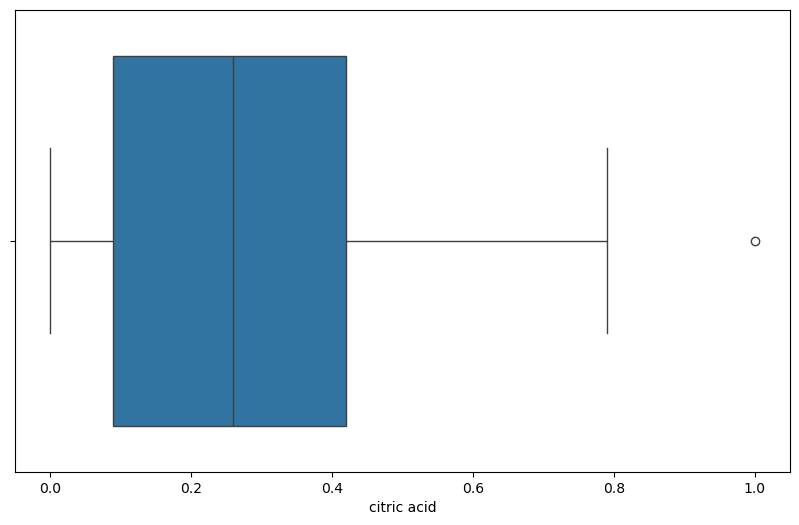

In [18]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['citric acid'])

<Axes: xlabel='residual sugar'>

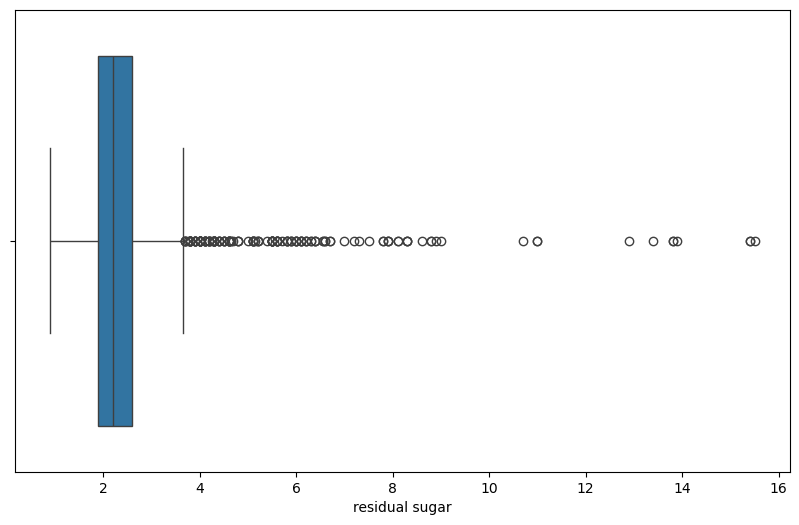

In [19]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['residual sugar'])

<Axes: xlabel='total sulfur dioxide'>

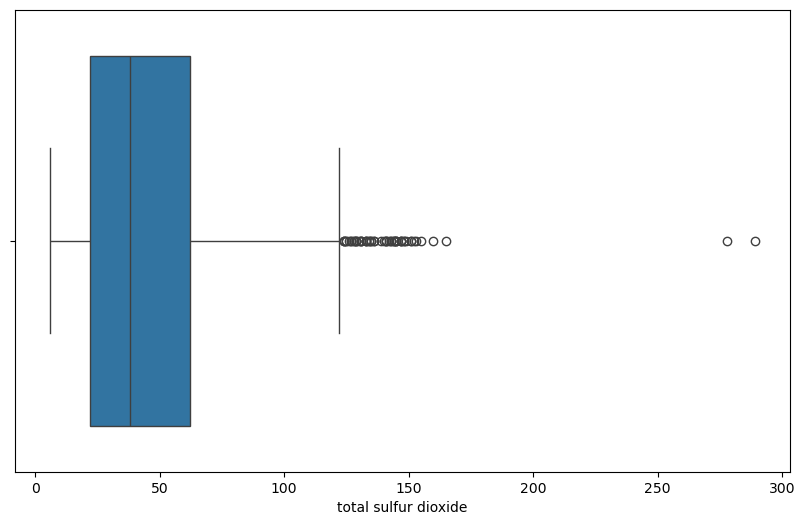

In [20]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['total sulfur dioxide'])

<Axes: xlabel='pH'>

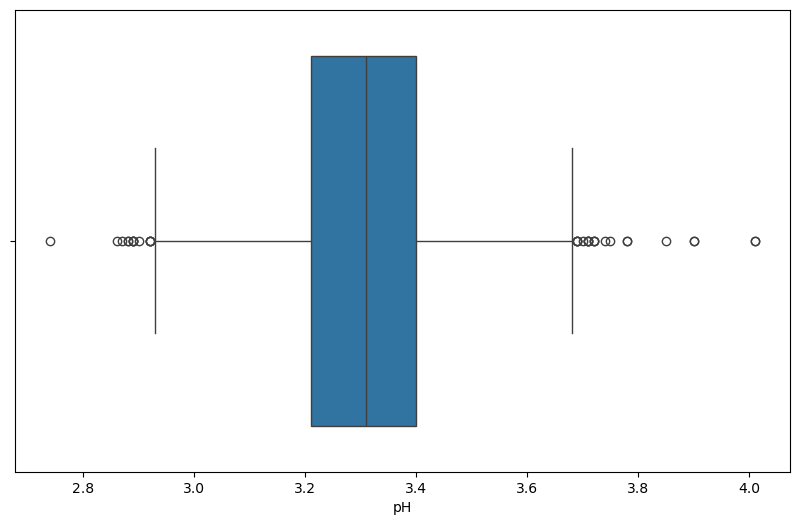

In [21]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['pH'])

<Axes: xlabel='alcohol'>

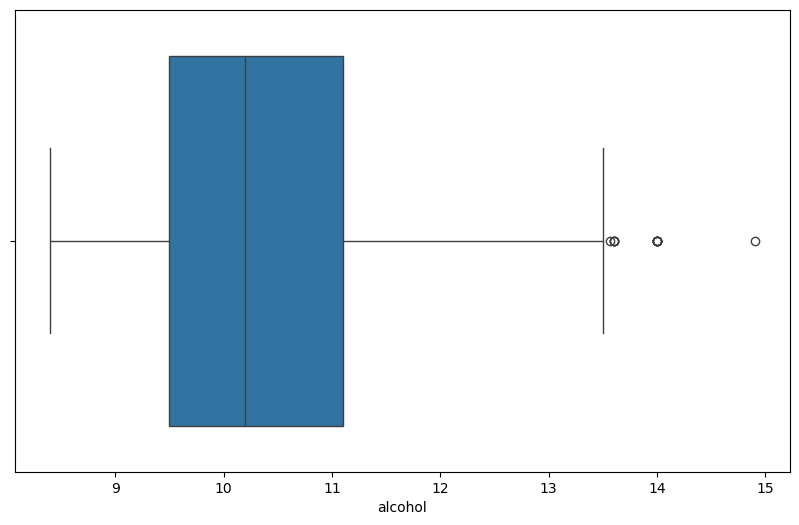

In [22]:
# Verificación de datos atípicos con Box Plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x=Data['alcohol'])

# Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [45]:
# La variable objetivo es la calidad, sin embargo, esta es ambigua para determinar la calidad del vino como bueno o malo.
# Acorde a las indicaciones del datase se debe utilizar el valor de siete como indicador de si un vino es bueno o malo

Data['quality'] = Data['quality'].apply(lambda x: 0 if x < 7 else 1)
print("Vinos de baja calidad: ", Data['quality'].isin([0]).sum())
print("Vinos de buena calidad: ", Data['quality'].isin([1]).sum())


Vinos de baja calidad:  1382
Vinos de buena calidad:  217


(array([1382.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

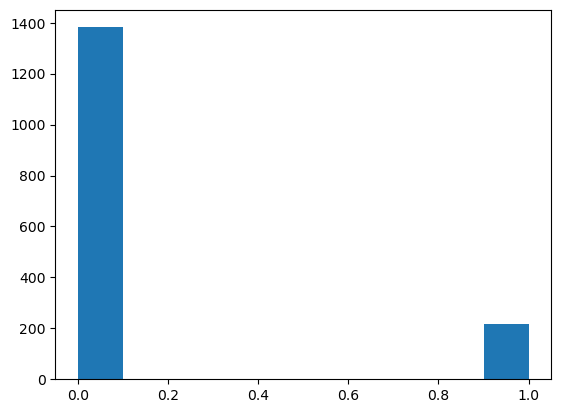

In [46]:
# Visualizamos en gráfica

plt.hist(Data['quality'])

In [50]:
# Establecemos las variables de predicción y objetivo, debido a la alta std de las variables relacionadas con el sulfuro
# estas no se utilizarán

predictors = Data.drop(columns=['free sulfur dioxide', 'total sulfur dioxide'])
target = Data['quality']

In [51]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,0


In [52]:
target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [54]:
# Realizar separación de datos TRAIN (80%) y datos TEST (20%) utilizando sklearn

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

# Entrenar el modelo configurando los diferentes hiperparámetros

[Text(0.5, 0.75, 'x[9] <= 0.5\ngini = 0.237\nsamples = 1279\nvalue = [1103.0, 176.0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1103\nvalue = [1103, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 176\nvalue = [0, 176]'),
 Text(0.625, 0.5, '  False')]

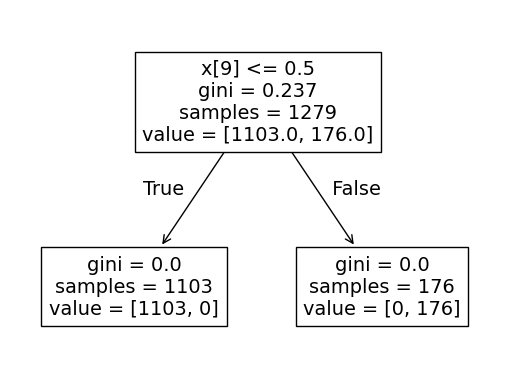

In [56]:
# Crear árbol de decisión

decTree = DecisionTreeClassifier()

decTree.fit(X_train, y_train)

plot_tree(decTree)

# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [58]:
# Verificación de predicción y métricas de confiabilidad

predictions = decTree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("El valor de accuracy es: ", accuracy)
print("El valor de precision es: ", precision)
print("El valor de recall es: ", recall)
print("El valor de f1 es: ", f1)

El valor de accuracy es:  1.0
El valor de precision es:  1.0
El valor de recall es:  1.0
El valor de f1 es:  1.0


# Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

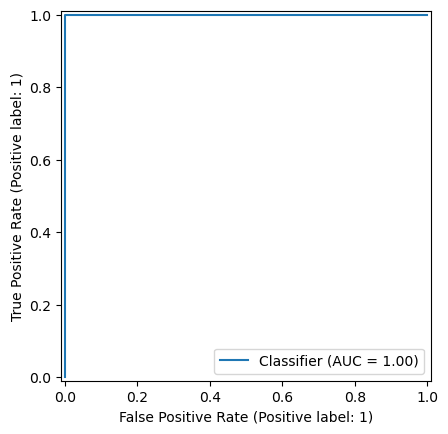

In [60]:
# ROC

RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

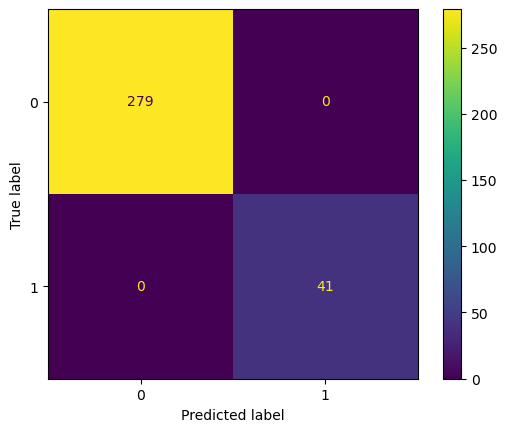

In [61]:
# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [62]:
# Classification Report

classReport = classification_report(y_test, predictions)
print(classReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        41

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



# Interpretar, analizar y documentar los resultados obtenidos

Conforme a los resultados de las métricas y lo evidenciado en las gráficas se puede determinar que el modelo es apto para clasificar adecuadamente la calidad del vino con base a sus diferentes características. No es necesario entrar en detalle ya que todas las métricas muestran que la predicción fue satisfactoria en un ciento por ciento y la _matriz de confusión_ muestra todos los resultados entre los TP y los TN.

Es importante recalcar que es posible que este modelo se vea afectado por la disparidad que se evidencia en el histograma de la columna _quality_ ya que la mayoría de valores se encuentran por debajo del delimitador de calidad, siendo este el valor de 7. Por consiguiente, la muestra de vinos tanto de entrenamiento como de testeo se encuentra muy dispareja y no podría llamarse representativa a la diversa calidad de vinos.